**Persistence Model**

In [2]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

df_W = pd.read_csv("WeekyEnergyConsumption_df.csv").set_index("Datetime")
df_W.head()

,Total_MW,Weeks
Datetime,,
2012-01-01,46188.163043,1
2012-01-08,54688.875000,2
2012-01-15,55755.767857,3
2012-01-22,57336.458333,4
2012-01-29,53328.892857,5


**Weekly Resampled Dataset: Train | Test Datasets**

*6-years of data. Train: ~5-years; Test: ~1-year*

In [3]:
X = df_W.Total_MW
size = int(len(X) * 0.837)
train, test = X[0:size], X[size:len(X)]

print("Train set: " + str(len(train)) + " weeks")
print("Test set: " + str(len(test)) + " weeks")

Train set: 262 weeks
Test set: 52 weeks


**Persistence Model**

*Root Mean Squarred Error: Metric of Accuracy of Model*

In [4]:
#Persistence Model:
history = [x for x in train]
predictions = list()
for i in range(len(train)):
    #predict
    yhat = history[-1]
    predictions.append(yhat)
    #observation
    obs = train[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

rmse = sqrt(mean_squared_error(train, predictions))
print("rmse: %.3f" % rmse)

>Predicted=49299.982, Expected=46188
>Predicted=46188.163, Expected=54689
>Predicted=54688.875, Expected=55756
>Predicted=55755.768, Expected=57336
>Predicted=57336.458, Expected=53329
>Predicted=53328.893, Expected=51260
>Predicted=51259.887, Expected=56397
>Predicted=56396.667, Expected=53201
>Predicted=53201.238, Expected=52290
>Predicted=52289.667, Expected=50489
>Predicted=50488.899, Expected=50498
>Predicted=50497.574, Expected=45657
>Predicted=45657.137, Expected=46693
>Predicted=46693.327, Expected=45269
>Predicted=45268.548, Expected=44225
>Predicted=44224.506, Expected=46078
>Predicted=46078.232, Expected=45661
>Predicted=45660.839, Expected=45901
>Predicted=45901.065, Expected=48906
>Predicted=48905.923, Expected=45690
>Predicted=45689.577, Expected=48137
>Predicted=48137.071, Expected=53105
>Predicted=53105.321, Expected=51118
>Predicted=51117.780, Expected=50815
>Predicted=50815.375, Expected=54866
>Predicted=54865.595, Expected=62059
>Predicted=62059.214, Expected=59123
>

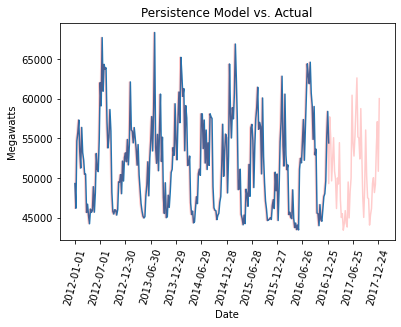

In [9]:
plt.plot(predictions)
plt.plot(df_W.Total_MW, color='red', alpha=.2)
plt.xticks(np.arange(0, len(X), 26))
plt.xticks(rotation=75)
plt.ylabel('Megawatts')
plt.xlabel("Date")
plt.title("Persistence Model vs. Actual")
plt.savefig("Figures/PersistenceModel.jpg")